In [4]:
import sys
import os
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path + "/../../src/simulations_v2")
from stochastic_simulation import StochasticSimulation
from load_params import load_params


ModuleNotFoundError: No module named 'util_functions'

In [8]:
virtual_params.keys()

dict_keys(['severity_prevalence', 'mild_symptoms_daily_self_report_p', 'severe_symptoms_daily_self_report_p', 'perform_contact_tracing', 'cases_isolated_per_contact', 'cases_quarantined_per_contact', 'contact_trace_testing_frac', 'contact_tracing_delay', 'sample_QI_exit_function', 'sample_QS_exit_function', 'daily_outside_infection_p', 'expected_contacts_per_day', 'exposed_infection_p', 'initial_ID_prevalence', 'initial_R_count', 'population_size', 'test_population_fraction', 'days_between_tests', 'test_protocol_QFNR', 'test_protocol_QFPR', 'use_asymptomatic_testing', 'max_time_exposed', 'exposed_time_function', 'max_time_ID', 'ID_time_function', 'max_time_SyID_mild', 'SyID_mild_time_function', 'max_time_SyID_severe', 'SyID_severe_time_function', 'max_time_pre_ID', 'pre_ID_time_function', 'initial_E_count', 'initial_pre_ID_count', 'initial_ID_count', 'initial_SyID_mild_count', 'initial_SyID_severe_count', 'pre_ID_state', 'mild_severity_levels'])

In [2]:
import numpy as np
virtual_params = load_params("./high_contact_ug_virtual_config.yaml")[1]


transmission_multipliers = np.linspace(0.2,1,9)

print("simulating transmission multipliers {}".format(transmission_multipliers))

nreps = 50
horizon = 7 * 3

base_transmission = virtual_params['exposed_infection_p']

sim_df_results = {}
for mult in transmission_multipliers:
    virtual_params['exposed_infection_p'] = base_transmission * mult
    sim = StochasticSimulation(virtual_params)
    sim_dfs = []
    for _ in range(nreps):
        sim_dfs.append(sim.run_new_trajectory(horizon))
    sim_df_results[mult] = sim_dfs
    print("finished simulating {}".format(mult))

/home/aaj54/group-testing/notebooks/spring_2022_sims/../../src/simulations_v2/load_params.py:136: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  params = yaml.load(f)
/home/aaj54/group-testing/notebooks/spring_2022_sims/../../src/simulations_v2/load_params.py:45: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  age_sev_params = yaml.load(f)


simulating transmission multipliers [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
finished simulating 0.2
finished simulating 0.30000000000000004
finished simulating 0.4
finished simulating 0.5
finished simulating 0.6000000000000001
finished simulating 0.7
finished simulating 0.8
finished simulating 0.9000000000000001
finished simulating 1.0


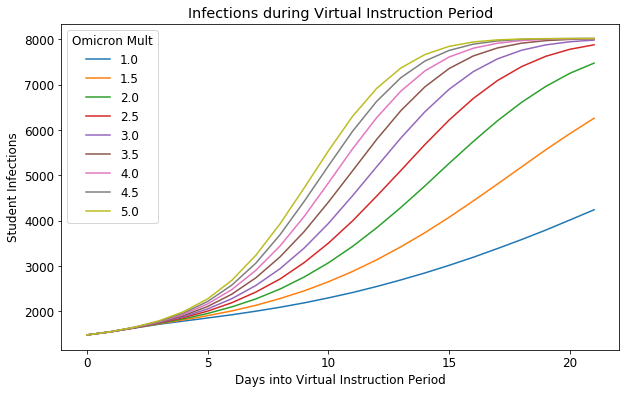

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
for mult in transmission_multipliers:
    inf_trajs = list()
    for sim_df in sim_df_results[mult]:
        inf_trajs.append(get_cum_inf_trajectory(sim_df))
    plt.plot(np.mean(inf_trajs, axis=0), label=5*round(mult,1))
    
plt.title('Infections during Virtual Instruction Period')
plt.xlabel('Days into Virtual Instruction Period')
plt.ylabel('Student Infections')
plt.legend(title='Omicron Mult')
plt.show()

In [11]:
def get_cum_inf_trajectory(df):
    return np.sum(df[['cumulative_mild', 'cumulative_severe']], axis=1)

inf_trajs = list()
for sim_df in sim_df_results[1.0]:
    inf_trajs.append(get_cum_inf_trajectory(sim_df))
np.mean(inf_trajs, axis=0)

array([1478.38, 1551.26, 1653.7 , 1793.32, 1991.14, 2273.74, 2681.34,
       3237.62, 3930.38, 4722.68, 5538.02, 6299.22, 6916.98, 7366.32,
       7663.82, 7843.92, 7940.48, 7986.48, 8006.36, 8013.98, 8016.74,
       8017.6 ])

In [18]:
def get_QI_R(df):
    return df[['QI', 'R']].iloc[df.shape[0] - 1].sum()

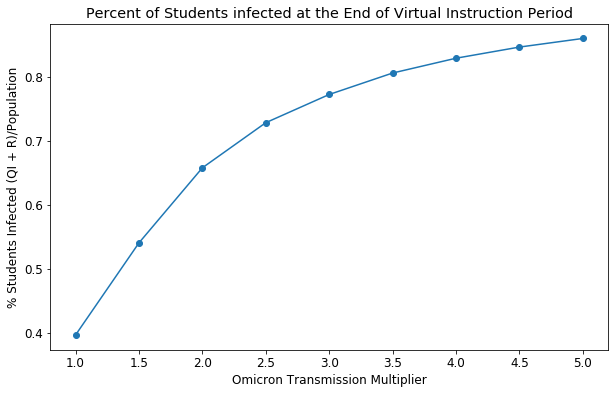

In [25]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
QI_R_popsize = list()
for mult in transmission_multipliers:
    QI_R_pop = list()
    for sim_df in sim_df_results[mult]:
        QI_R_pop.append(get_QI_R(sim_df))
    QI_R_popsize.append(np.mean(QI_R_pop) / virtual_params['population_size'])

plt.plot(5 * np.array(transmission_multipliers), QI_R_popsize, marker='o')
    
plt.title('Percent of Students infected at the End of Virtual Instruction Period')
plt.xlabel('Omicron Transmission Multiplier')
plt.ylabel('% Students Infected (QI + R)/Population')
# plt.legend(title='Omicron Mult')
plt.show()

In [3]:
df = sim_dfs[0]

In [4]:
df.columns

Index(['S', 'QS', 'QI', 'R', 'E_0', 'E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6',
       'pre_ID_0', 'pre_ID_1', 'pre_ID_2', 'pre_ID_3', 'ID_0', 'ID_1', 'ID_2',
       'ID_3', 'ID_4', 'ID_5', 'ID_6', 'ID_7', 'SyID_mild_0', 'SyID_mild_1',
       'SyID_mild_2', 'SyID_mild_3', 'SyID_mild_4', 'SyID_mild_5',
       'SyID_mild_6', 'SyID_mild_7', 'SyID_mild_8', 'SyID_mild_9',
       'SyID_mild_10', 'SyID_mild_11', 'SyID_mild_12', 'SyID_mild_13',
       'SyID_mild_14', 'SyID_mild_15', 'SyID_mild_16', 'SyID_mild_17',
       'SyID_mild_18', 'SyID_mild_19', 'SyID_severe_0', 'SyID_severe_1',
       'SyID_severe_2', 'SyID_severe_3', 'SyID_severe_4', 'SyID_severe_5',
       'SyID_severe_6', 'SyID_severe_7', 'SyID_severe_8', 'SyID_severe_9',
       'SyID_severe_10', 'SyID_severe_11', 'SyID_severe_12', 'SyID_severe_13',
       'SyID_severe_14', 'SyID_severe_15', 'SyID_severe_16', 'SyID_severe_17',
       'SyID_severe_18', 'SyID_severe_19', 'cumulative_mild',
       'cumulative_severe', 'cumulative_outside

In [5]:
sim.mild_symptoms_p

0.4780858358114497

In [7]:
df

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections,severity_0,severity_1,severity_2,severity_3
0,6234,0,0,1463,0,0,0,0,0,0,...,0,0,0,1474,10,0,1474,9.75404,0.180158,0.0658005
1,5744,0,22,1465,125,130,77,51,20,5,...,0,1,0,1490,48,1,1490,46.8194,0.864759,0.315842
2,5293,0,41,1473,272,198,127,57,21,11,...,1,0,3,1530,101,3,1530,98.5158,1.8196,0.664585
3,4679,0,72,1483,363,279,160,92,37,7,...,2,3,0,1610,182,4,1610,177.524,3.27888,1.19757
4,3815,0,140,1495,519,412,241,110,37,11,...,6,0,1,1694,301,4,1694,293.597,5.42276,1.98059
5,2776,0,227,1521,698,521,307,124,48,14,...,3,4,4,1853,466,4,1853,454.538,8.39537,3.0663
6,1623,0,333,1555,848,630,324,139,58,19,...,4,5,6,2052,687,4,2052,670.103,12.3769,4.52049
7,733,0,497,1612,868,583,296,145,44,19,...,7,8,5,2305,998,4,2305,973.453,17.9798,6.56689
8,148,0,681,1689,742,448,262,93,41,11,...,14,11,5,2657,1353,4,2657,1319.72,24.3754,8.90281
9,13,0,879,1794,486,296,115,53,14,3,...,18,11,6,3052,1779,4,3052,1735.24,32.0501,11.7059


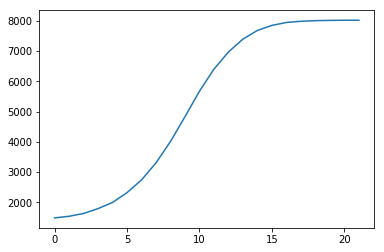

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

df[['cumulative_severe', 'cumulative_mild']].sum(axis=1).plot()

In [6]:
sim = StochasticSimulation(virtual_params)

In [4]:
virtual_params

('Undergrads in Ithaca during virtual instruction',
 {'ID_time_function': <function analysis_helpers.poisson_waiting_function.<locals>.<lambda>>,
  'SyID_mild_time_function': <function analysis_helpers.poisson_waiting_function.<locals>.<lambda>>,
  'SyID_severe_time_function': <function analysis_helpers.poisson_waiting_function.<locals>.<lambda>>,
  'cases_isolated_per_contact': 0,
  'cases_quarantined_per_contact': 0,
  'contact_trace_testing_frac': 1,
  'contact_tracing_delay': 1,
  'daily_outside_infection_p': 7.1e-05,
  'days_between_tests': 1,
  'expected_contacts_per_day': 10.66,
  'exposed_infection_p': 0.179,
  'exposed_time_function': <function analysis_helpers.poisson_waiting_function.<locals>.<lambda>>,
  'initial_E_count': 0,
  'initial_ID_count': 0,
  'initial_ID_prevalence': 0.04,
  'initial_SyID_mild_count': 0,
  'initial_SyID_severe_count': 0,
  'initial_pre_ID_count': 0,
  'max_time_ID': 8,
  'max_time_SyID_mild': 20,
  'max_time_SyID_severe': 20,
  'max_time_exposed':